In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

print(f'O conjunto de dados customers tem {len(customers)} entradas')
print(f'O conjunto de dados orders tem {len(orders)} entradas')
print(f'O conjunto de dados order_items tem {len(order_items)} entradas')
print(f'O conjunto de dados products tem {len(products)} entradas')

O conjunto de dados customers tem 99441 entradas
O conjunto de dados orders tem 99441 entradas
O conjunto de dados order_items tem 112650 entradas
O conjunto de dados products tem 32951 entradas


In [2]:
df = customers.merge(orders, left_on='customer_id', right_on='customer_id')
df = df.merge(order_items, left_on='order_id', right_on='order_id')

In [3]:
print(f'O conjunto de dados df tem {len(df)} entradas e {len(df.columns.tolist())} colunas')
#df[['customer_id','customer_city']]

O conjunto de dados df tem 112650 entradas e 18 colunas


(0, 1500)

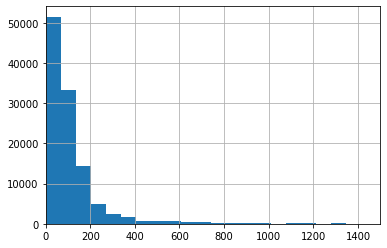

In [4]:
df.price.hist(bins=100)
plt.xlim(0, 1500)

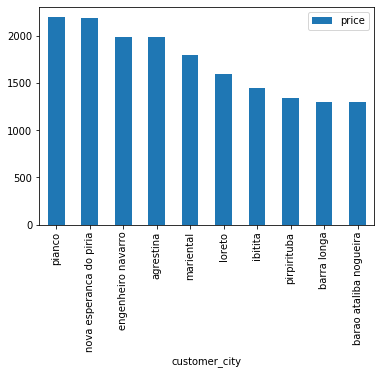

In [5]:
#media de compras para cada cidade
df[['customer_city','price']].groupby(by='customer_city').mean().sort_values(by='price', ascending=False).head(10).plot.bar()

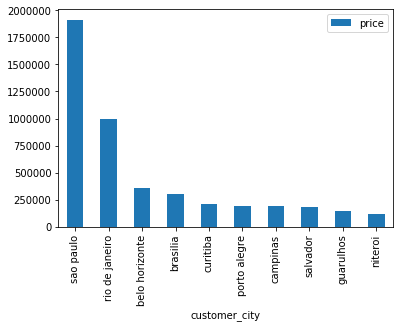

In [6]:
# soma de compras para cada cidade
df[['customer_city','price']].groupby(by='customer_city').sum().sort_values(by='price', ascending=False).head(10).plot.bar()

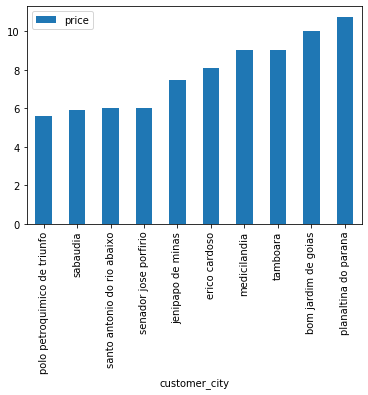

In [7]:
# soma de compras para cada cidade - menores
df[['customer_city','price']].groupby(by='customer_city').sum().sort_values(by='price', ascending=True).head(10).plot.bar()

In [8]:
df = df.merge(products[['product_id', 'product_category_name']], left_on='product_id', right_on='product_id')

In [9]:
# categorias de produts com maior venda em valor - preço medio
df[['product_category_name', 'price']].groupby(by='product_category_name').mean().sort_values(by='price', ascending=False).head(10)

,price
product_category_name,
pcs,1098.340542
portateis_casa_forno_e_cafe,624.285658
eletrodomesticos_2,476.124958
agro_industria_e_comercio,342.124858
instrumentos_musicais,281.616000
eletroportateis,280.778468
portateis_cozinha_e_preparadores_de_alimentos,264.568667
telefonia_fixa,225.693182
construcao_ferramentas_seguranca,208.992371


In [10]:
# categorias de produts com maior venda em valor - valume de vendas medio
df[['product_category_name', 'price']].groupby(by='product_category_name').sum().sort_values(by='price', ascending=False).head(10)

,price
product_category_name,
beleza_saude,1258681.34
relogios_presentes,1205005.68
cama_mesa_banho,1036988.68
esporte_lazer,988048.97
informatica_acessorios,911954.32
moveis_decoracao,729762.49
cool_stuff,635290.85
utilidades_domesticas,632248.66
automotivo,592720.11


In [11]:
# categorias de produts com maior venda em valor - valume de vendas medio
df[['customer_state', 'product_category_name', 'price']].groupby(by=['customer_state', 'product_category_name']).sum().sort_values(by=['customer_state', 'price'], ascending=False).groupby('customer_state').head(10).to_csv('top10catstat.csv')

In [12]:
tab1 = df[['customer_city','price']].groupby(by='customer_city').sum().sort_values(by='price', ascending=False).head(10)
tab2 = df[['customer_city','price']].groupby(by='customer_city').sum().sort_values(by='price', ascending=True).head(10)

In [13]:
idhm = [0.805, 0.799, 0.81, 0.824, 0.823, 0.805, 0.805, 0.759, 0.763, 0.837]
tab1['idhm'] = idhm
tab1.rename(columns={"price": "Valor total"})

,Valor total,idhm
customer_city,,
sao paulo,1914924.54,0.805
rio de janeiro,992538.86,0.799
belo horizonte,355611.13,0.810
brasilia,301920.25,0.824
curitiba,211738.06,0.823
porto alegre,190562.08,0.805
campinas,187844.53,0.805
salvador,181104.42,0.759
guarulhos,144268.39,0.763


In [14]:
idhm = [0.805, 0.799, 0.81, 0.824, 0.823, 0.805, 0.805, 0.759, 0.763, 0.837]
tab1['idhm'] = idhm
tab1.rename(columns={"price": "Valor total"})

,Valor total,idhm
customer_city,,
sao paulo,1914924.54,0.805
rio de janeiro,992538.86,0.799
belo horizonte,355611.13,0.810
brasilia,301920.25,0.824
curitiba,211738.06,0.823
porto alegre,190562.08,0.805
campinas,187844.53,0.805
salvador,181104.42,0.759
guarulhos,144268.39,0.763


In [15]:
idhm = [0.609, 0.74, 0.669, 0.514, 0.624, 0.584, 0.582, 0.731, 0.67, 0.705]
tab2['idhm'] = idhm
tab2.rename(columns={"price": "Valor total"})

,Valor total,idhm
customer_city,,
polo petroquimico de triunfo,5.60,0.609
sabaudia,5.90,0.740
santo antonio do rio abaixo,6.00,0.669
senador jose porfirio,6.00,0.514
jenipapo de minas,7.48,0.624
erico cardoso,8.09,0.584
medicilandia,8.99,0.582
tamboara,8.99,0.731
bom jardim de goias,10.00,0.670


In [16]:
tab1.corr()

,price,idhm
price,1.000000,0.030765
idhm,0.030765,1.000000


In [17]:
tab2.corr()

,price,idhm
price,1.000000,0.276647
idhm,0.276647,1.000000


In [18]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-03-28 18:23:51,2017-04-11 10:16:56,2017-04-24 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-04-05 15:25:11,126.99,15.06,moveis_escritorio
6,fbd40c083aa8cddebb5265b2ba6aaf2e,f40ab89b622248b7ca125af4b486b887,32341,contagem,MG,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-17 03:45:27,2017-05-23 10:35:48,2017-05-29 12:04:19,2017-06-07 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-23 03:45:27,124.99,30.71,moveis_escritorio
7,10558ef4afea173bfb5e2cbe3d5b0bb5,749943913a9851a39c9baf51877fbab6,78134,varzea grande,MT,eaae5bd20fb15d85aa673d9b7c0e8ca5,delivered,2017-03-18 23:04:36,2017-03-18 23:04:36,2017-03-28 06:29:47,2017-05-30 09:19:58,2017-04-27 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-03-29 23:04:36,126.99,21.34,moveis_escritorio
8,1c37c0f0cd1d88d46d9fc9494762abbd,432ecfa8b7b7ad2663c7abed0dc83c51,31270,belo horizonte,MG,c4e2bd2043fbd75b325a47adfabf0d77,delivered,2018-03-15 07:45:10,2018-03-15 07:55:24,2018-03-27 15:58:41,2018-04-05 12:37:25,2018-04-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-03-29 07:55:24,116.99,33.08,moveis_escritorio
9,20a452f528d487411fd7d3ebda1d0f20,31318a0597cd9d50ce4cfd03c80fe780,37540,santa rita do sapucai,MG,1c7fe02ac4c7be50c59afb295cf85b89,delivered,2018-01-26 13:22:09,2018-01-30 03:47:31,2018-02-09 13:17:44,2018-02-20 14:18:51,2018-03-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-13 03:47:31,106.99,21.76,moveis_escritorio


In [19]:
time = '2017-05-16 15:05:35'.split(' ')[0].split('-')[1]

In [20]:
df['mes_compra'] = df.apply(lambda row: int(row.order_purchase_timestamp.split(' ')[0].split('-')[1]), axis=1)

In [32]:
dftemp = df[df.mes_compra == 1]
mesmes = dftemp[['customer_state', 'product_category_name', 'price']].groupby(by=['customer_state', 'product_category_name']).sum().sort_values(by=['customer_state', 'price'], ascending=False).groupby('customer_state').head(10)
mesmes['mes_compra'] = [1]*len(mesmes)
mesmes.to_csv('mesmes.csv', mode='a')
for i in range(2,13):
    print(i)
    dftemp = df[df.mes_compra == i]
    dftempmes = dftemp[['customer_state', 'product_category_name', 'price']].groupby(by=['customer_state', 'product_category_name']).sum().sort_values(by=['customer_state', 'price'], ascending=False).groupby('customer_state').head(10)
    dftempmes['mes_compra'] = [i]*len(dftempmes)
    dftempmes.to_csv('mesmes.csv', mode='a', header=False)

2
3
4
5
6
7
8
9
10
11
12


In [31]:
mesmes.to_csv('teste.csv')

In [30]:
mesmes[mesmes.mes_compra == 4]

,,price,mes_compra
customer_state,product_category_name,,
